# Airline on time performance
## by Carolina Negrelli

## Preliminary Wrangling

> In this project I'm going to analyze a data set with information about flights in the United States. 

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

> This data set is one of the selected by udacity. But the file has been deleted from the source given in the dataset options (http://stat-computing.org/dataexpo/2009/the-data.html), insteed I had to go to the original source and download the full table (https://www.transtats.bts.gov/DL_SelectFields.asp). I downloaded the data from January 2019 to December 2019.

In [29]:
#path = r'C:\DRO\DCL_rawdata_files' # use your path
all_files = glob.glob("data/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,76,77,84,85,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,77,84) have mixed types.Specify dtype option on import 

> I will keep only the columns described on the source given by Udacity. I will drop the column Year since it's olny data from 2019. Three of the columns have another name: TailNum -> Tail_Number, FlightNum -> Flight_Number_Reporting_Airline, UniqueCarrier -> Reporting_Airline

In [34]:
flights = frame[['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','Reporting_Airline','Flight_Number_Reporting_Airline','Tail_Number','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

> Let's take a look on the dataframe

In [35]:
flights.shape

(7422037, 28)

In [36]:
flights.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'Tail_Number', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [46]:
flights.sample(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7317193,8,11,7,453.0,500,728.0,757,AA,459,N585UW,...,3.0,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4397531,1,30,3,NaN,500,NaN,625,OO,3765,N803SK,...,NaN,NaN,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN
6179076,4,20,6,1104.0,1100,1321.0,1341,B6,2884,N583JB,...,8.0,12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6718498,4,20,6,2038.0,1905,2347.0,2223,DL,2919,N357NW,...,4.0,41.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,84.0
2016575,9,18,3,1554.0,1600,1748.0,1742,OO,3222,N766SK,...,17.0,19.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [52]:
flights.duplicated().sum()

0

In [58]:
flights.describe()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.268232e+06,7.421902e+06,7.268232e+06,7.268232e+06,7.291927e+06,7.422037e+06,7.284390e+06,7.288060e+06,7.422037e+06,7.422037e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06
mean,6.578750e+00,1.573196e+01,3.937155e+00,1.330259e+03,1.485790e+03,1.366903e+02,1.419022e+02,1.115734e+02,5.414849e+00,1.092327e+01,8.005442e+02,7.740776e+00,1.738935e+01,1.817897e-02,2.543776e-03,2.112859e+01,3.802404e+00,1.658795e+01,9.608329e-02,2.740748e+01
std,3.402585e+00,8.762183e+00,1.995814e+00,4.929855e+02,5.214659e+02,7.261274e+01,7.234685e+01,7.056123e+01,5.106666e+01,4.895964e+01,5.925118e+02,6.194340e+00,1.000398e+01,1.335983e-01,5.037167e-02,6.610465e+01,3.236297e+01,3.966440e+01,3.358346e+00,5.345620e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00,4.000000e+00,-9.900000e+01,-8.200000e+01,3.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,9.130000e+02,1.100000e+03,8.400000e+01,9.000000e+01,6.000000e+01,-1.500000e+01,-5.000000e+00,3.690000e+02,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.321000e+03,1.515000e+03,1.190000e+02,1.240000e+02,9.300000e+01,-6.000000e+00,-2.000000e+00,6.400000e+02,6.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,1.736000e+03,1.921000e+03,1.670000e+02,1.710000e+02,1.410000e+02,7.000000e+00,7.000000e+00,1.034000e+03,9.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,1.604000e+03,9.480000e+02,1.557000e+03,2.695000e+03,2.710000e+03,5.095000e+03,3.160000e+02,2.270000e+02,1.000000e+00,1.000000e+00,2.695000e+03,1.847000e+03,1.741000e+03,1.078000e+03,2.206000e+03


In [38]:
flights.dtypes

Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
DepTime                            float64
CRSDepTime                           int64
ArrTime                            float64
CRSArrTime                           int64
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
Tail_Number                         object
ActualElapsedTime                  float64
CRSElapsedTime                     float64
AirTime                            float64
ArrDelay                           float64
DepDelay                           float64
Origin                              object
Dest                                object
Distance                           float64
TaxiIn                             float64
TaxiOut                            float64
Cancelled                          float64
CancellationCode                    object
Diverted                           float64
CarrierDela

Some problems with data types: 
- DepTime and CRSDepTime have diferent types. Idem ArrTime and CRSArrTime. Have both columns (in both cases) is not necessary since there is a column for the delay. I will keep only the scheduled times (CRS).
- Flight_Number should be a string
- Cancelled should be an integer 1: yes , 0:no. Idem Diverted

I will adress this problems before plotting

In [47]:
#code
flights.drop(['DepTime','ArrTime'],axis=1,inplace=True)

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
#test
flights.shape

(7422037, 26)

In [51]:
#code
flights['Flight_Number_Reporting_Airline']=flights['Flight_Number_Reporting_Airline'].astype('str') 

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
#code
flights['Cancelled']=flights['Cancelled'].astype('int')
flights['Diverted']=flights['Diverted'].astype('int')

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
#test
flights.dtypes

Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
CRSDepTime                           int64
CRSArrTime                           int64
Reporting_Airline                   object
Flight_Number_Reporting_Airline     object
Tail_Number                         object
ActualElapsedTime                  float64
CRSElapsedTime                     float64
AirTime                            float64
ArrDelay                           float64
DepDelay                           float64
Origin                              object
Dest                                object
Distance                           float64
TaxiIn                             float64
TaxiOut                            float64
Cancelled                            int64
CancellationCode                    object
Diverted                             int64
CarrierDelay                       float64
WeatherDelay                       float64
NASDelay   

### What is the structure of your dataset?

> There are 7422037 flights (rows) with 26 festures (columns). Most variables are numerical but there are some categorical. 

### What is/are the main feature(s) of interest in your dataset?

> All the features asociated with delates, like Cancelled, ArrDelay, DepDelay, etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the features should be explored, but at first I will said that Date, Time, Airline, Origin and Dest have a big influence.

## Univariate Exploration

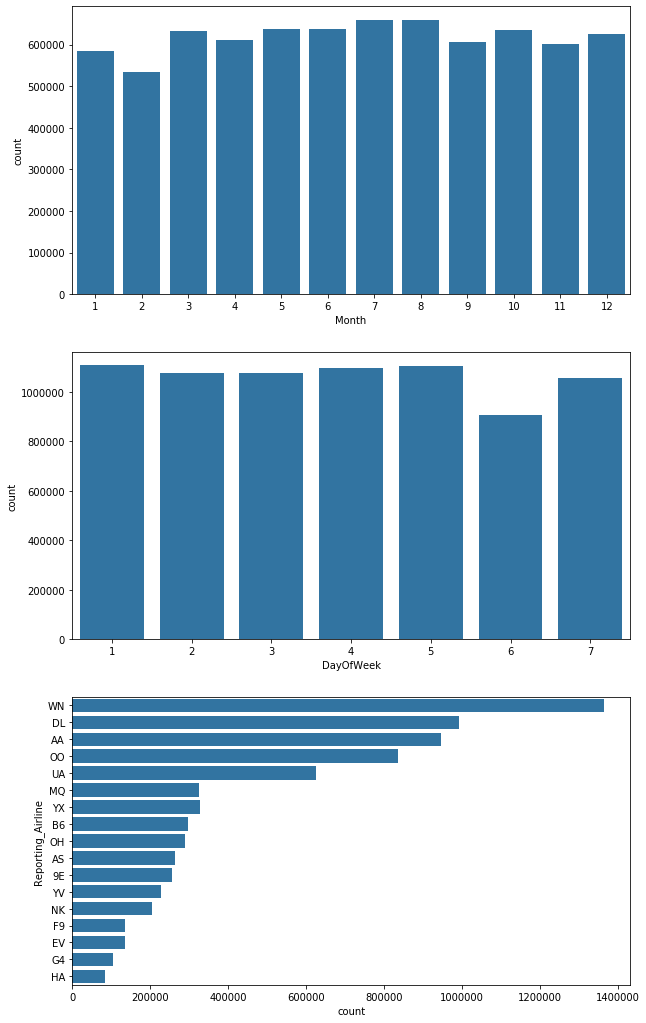

In [178]:
#let's start with the distribution of month, day of week and airline
fig, ax = plt.subplots(nrows=3, figsize = [10,18])

base_color = sb.color_palette()[0]
sb.countplot(data = flights, x = 'Month', color = base_color, ax = ax[0])
sb.countplot(data = flights, x = 'DayOfWeek', color = base_color, ax = ax[1])
order=df['Reporting_Airline'].value_counts().index
sb.countplot(data=flights,y='Reporting_Airline',color=base_color,order=order)

- As expected, there are more flights on July and August (Holidays) but this is not a remarkable difference.
- Saturdays (6) are less flights than other days.
- There are 5 main airlines: WN (Southwest Airlines), DL (Delta Airlines), AA (American Airlines), OO (Skywest Airlines) and UA (United Airlines)

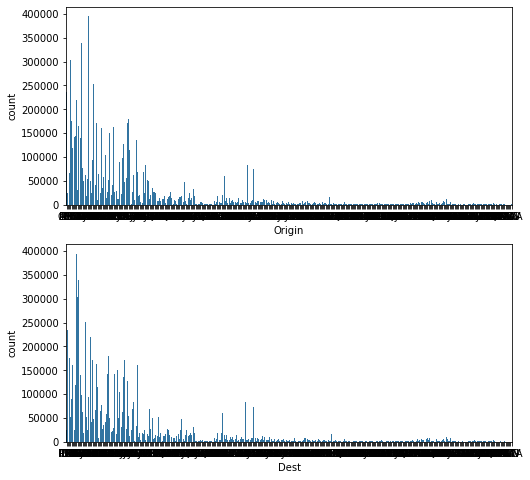

In [110]:
# what about departure and arrival cities?
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
sb.countplot(data = flights, x = 'Origin', color = base_color, ax = ax[0])
sb.countplot(data = flights, x = 'Dest', color = base_color, ax = ax[1])

- This plots doesn't tell us much: there are  a lot of cities, some with a bigger count than others. We can take a look to the biggest counts but we are not going to continue improving this plot for now.

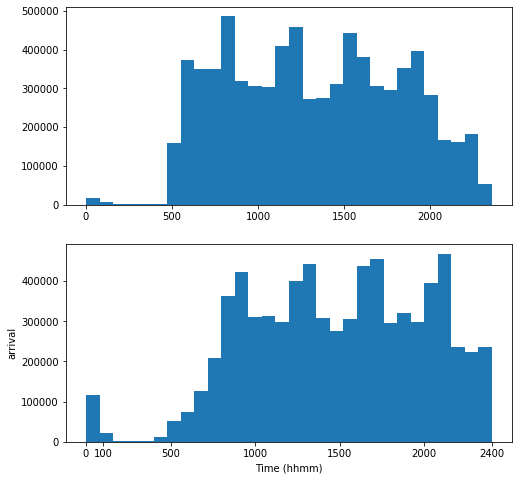

In [125]:
# departure and arrival times
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
ax[0].hist(data = flights, x = 'CRSDepTime',bins=30)
plt.ylabel('arrival')
ax[1].hist(data = flights, x = 'CRSArrTime',bins=30)
plt.xticks([0,100,500,1000,1500,2000,2400])
plt.xlabel('Time (hhmm)');

- both distributions are left skewed: there are very little flights before 5am.
- in both cases there are four peaks of flights: one in the morning, one in the nooin, one in the afternoon and one at night.

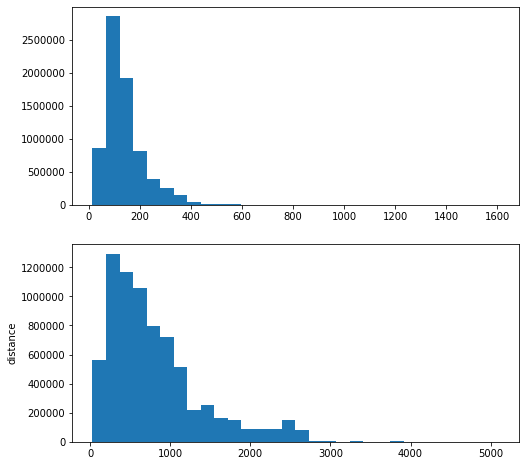

In [128]:
# elapsed time and distance
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
ax[0].hist(data = flights, x = 'ActualElapsedTime',bins=30)
plt.ylabel('distance')
ax[1].hist(data = flights, x = 'Distance',bins=30);

- both distributions are very right skewed. It makes sense that both have the same distribution because the distance and the time elapsed should be correlated. We'll see this later.

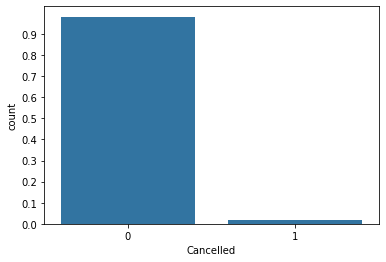

In [94]:
#relative frequencies: cancellations and diverted flights
n=flights.shape[0]
max_count=flights.Cancelled.value_counts().max()
max_prop=max_count/n
#plot
base_color = sb.color_palette()[0]
ticks=np.arange(0,max_prop,0.1)
ticks_names=['{:0.1f}'.format(v) for v in ticks]
plt.yticks(ticks*n,ticks_names)
sb.countplot(data = flights, x = 'Cancelled', color = base_color)

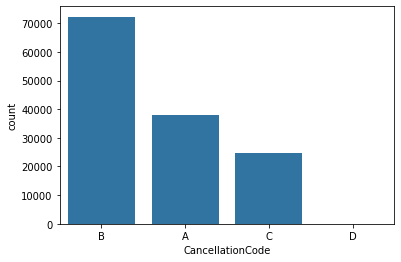

In [101]:
sb.countplot(data=flights, x='CancellationCode',color=base_color) #the letters has no ordinal meaning

In [95]:
flights[flights.Cancelled == 1].shape[0]/n

0.018178971621941525

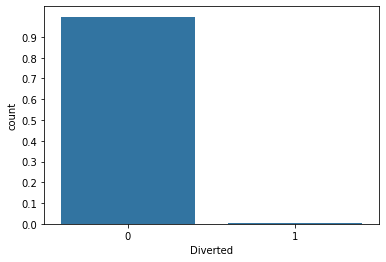

In [96]:
#relative frequencies
n=flights.shape[0]
max_count=flights.Diverted.value_counts().max()
max_prop=max_count/n
#plot
base_color = sb.color_palette()[0]
ticks=np.arange(0,max_prop,0.1)
ticks_names=['{:0.1f}'.format(v) for v in ticks]
plt.yticks(ticks*n,ticks_names)
sb.countplot(data = flights, x = 'Diverted', color = base_color)

In [97]:
flights[flights.Diverted == 1].shape[0]/n

0.002543776055010235

- less than 2% of the flights were cancelled
- the most frequent cancellation reason is weather (B), follow by carrier (A) and National Air System (C). There is almost no cancellations due to security issues (D).
- less than 0.5% of the flights were diverted

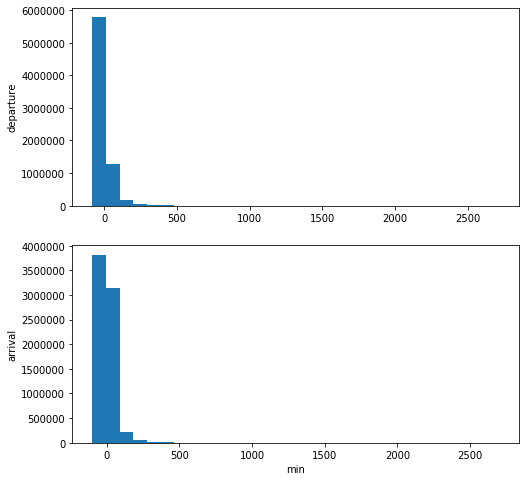

In [134]:
plt.figure(figsize = [8,8])

base_color = sb.color_palette()[0]
plt.subplot(2,1,1)
plt.hist(data = flights, x = 'DepDelay',bins=30)
plt.ylabel('departure')
plt.subplot(2,1,2)
plt.hist(data = flights, x = 'ArrDelay',bins=30)
plt.ylabel('arrival')
plt.xlabel('min');

let's some in. There are clearly some outiers.

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


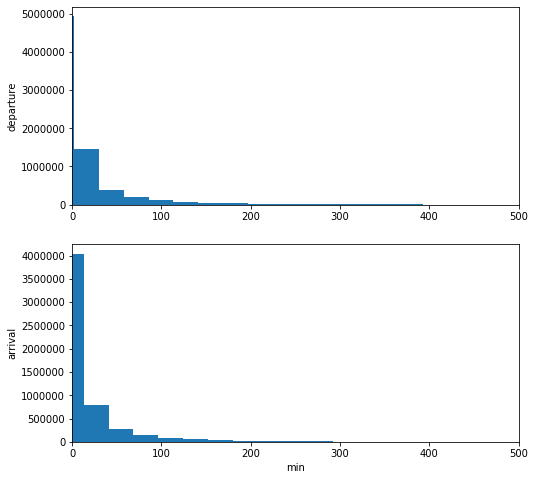

In [143]:
plt.figure(figsize = [8,8])

base_color = sb.color_palette()[0]
plt.subplot(2,1,1)
plt.hist(data = flights, x = 'DepDelay',bins=100)
plt.ylabel('departure')
plt.xlim(0,500)
plt.subplot(2,1,2)
plt.hist(data = flights, x = 'ArrDelay',bins=100)
plt.ylabel('arrival')
plt.xlabel('min')
plt.xlim(0,500);

- Both distributions are very right skewed. We can consider every time bigger than 300 as an outlier.

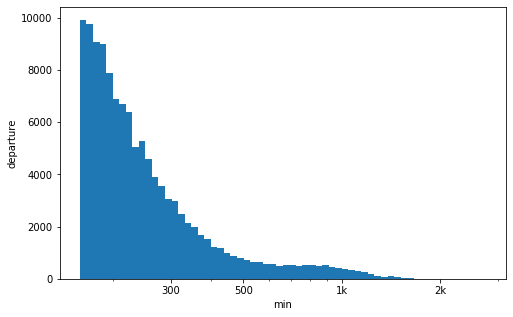

In [166]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(2.2, np.log10(flights['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([300,500, 1e3, 2e3], [300,500, '1k', '2k'])
plt.xlabel('min')
plt.ylabel('departure')
plt.show()

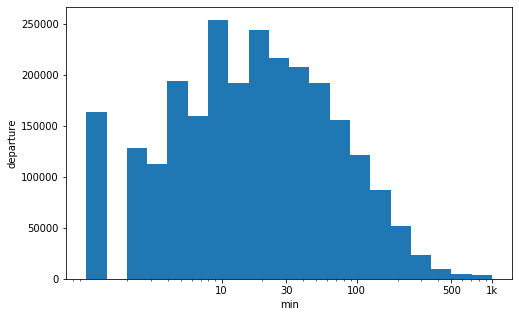

In [175]:
# there is a low peak around 900min that we didn't see before, but we need to zoom in to see the lowest values
log_binsize = 0.15
bins = 10 ** np.arange(0, np.log10(1000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([10,30,100,500, 1000], [10,30,100,500, '1k'])
plt.xlabel('min')
plt.ylabel('departure')
plt.show()

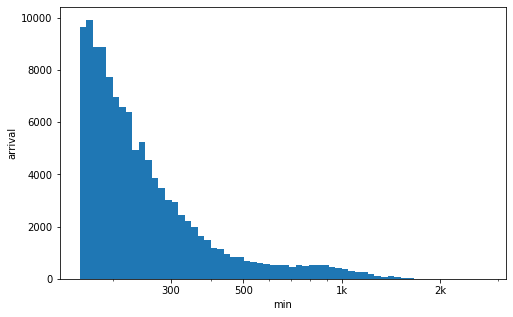

In [176]:
# let's do the same for arrivals
log_binsize = 0.02
bins = 10 ** np.arange(2.2, np.log10(flights['ArrDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'ArrDelay', bins = bins)
plt.xscale('log')
plt.xticks([300,500, 1e3, 2e3], [300,500, '1k', '2k'])
plt.xlabel('min')
plt.ylabel('arrival')
plt.show()

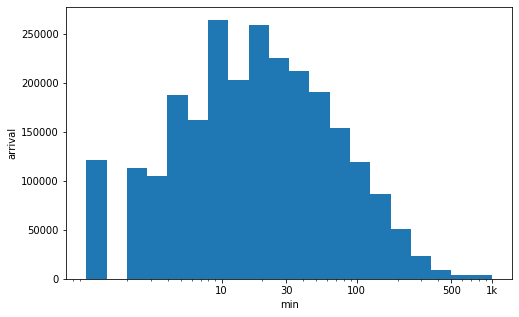

In [177]:
# there is a low peak around 900min that we didn't see before, but we need to zoom in to see the lowest values
log_binsize = 0.15
bins = 10 ** np.arange(0, np.log10(1000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'ArrDelay', bins = bins)
plt.xscale('log')
plt.xticks([10,30,100,500, 1000], [10,30,100,500, '1k'])
plt.xlabel('min')
plt.ylabel('arrival')
plt.show()

- Both delate times have a maximum around 30 min and a low peak around 900 min. There is probably a correlation between this values, we'll see that later.

In [142]:
flights[(flights.ArrDelay > 500) | (flights.DepDelay > 500)]

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,ActualElapsedTime,CRSElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
527,3,3,7,1615,1907,AA,470,N662AW,106.0,112.0,...,6.0,15.0,0,NaN,0,1561.0,0.0,0.0,0.0,0.0
1203,3,16,6,1712,1855,AA,488,N821AW,282.0,283.0,...,37.0,5.0,0,NaN,0,837.0,0.0,0.0,0.0,0.0
2242,3,27,3,840,922,AA,520,N153UW,145.0,162.0,...,7.0,15.0,0,NaN,0,76.0,0.0,0.0,0.0,461.0
3105,3,11,1,700,1032,AA,553,N154UW,120.0,152.0,...,6.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,537.0
3741,3,7,4,720,1005,AA,572,N740UW,314.0,285.0,...,10.0,17.0,0,NaN,0,1444.0,0.0,29.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371406,8,9,5,2226,619,AA,1929,N190UW,283.0,293.0,...,6.0,24.0,0,NaN,0,17.0,0.0,0.0,0.0,805.0
7371597,8,13,2,2232,614,AA,1936,N915US,269.0,282.0,...,11.0,17.0,0,NaN,0,727.0,0.0,0.0,0.0,53.0
7372431,8,3,6,1144,1533,AA,1961,N654AW,174.0,169.0,...,15.0,23.0,0,NaN,0,1238.0,0.0,5.0,0.0,0.0
7373838,8,16,5,600,647,AA,2005,N649AW,160.0,167.0,...,6.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,504.0


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!